In [81]:
import pandas as pd
import seaborn as sns
import requests
import xmltodict
from cobra import test

# 1 crossword

In [ ]:
# DON
# TPA
# NIC

# 2 pandas

In [34]:
algae = pd.read_csv("data_for_task2.csv")

In [46]:
algae_grouped = algae.melt(id_vars = ["species", "genus", "group"]).groupby(["genus", "variable"], as_index = False).mean()

In [50]:
algae_grouped.head()

,genus,variable,value
0,Ascophyllum,alanin,0.875429
1,Ascophyllum,citrate,5.253527
2,Ascophyllum,glucose,3.414961
3,Ascophyllum,oleic_acid,2.432526
4,Ascophyllum,sucrose,6.825467


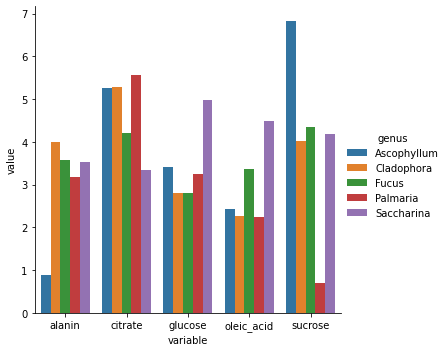

In [49]:
sns.catplot(data=algae_grouped, kind="bar", x="variable", y="value", hue="genus")

# 3 iterators

In [51]:
my_iter = map(lambda x: x % 3 == 0, [1,2,3,4,5,6])

In [61]:
while True:
    next(my_iter)

StopIteration: 

In [63]:
try:
    next(my_iter)
except StopIteration:
    print("End of the iterator")
    

End of the iterator


In [ ]:
# It is better to use iterator in case of very big data because it creates the object at the moment of request.

# 4 API

In [76]:
numbers = [22, 43, 264, 1990]
url = "http://numbersapi.com/"

In [79]:
result = {}
for i in numbers:
    result[i] = {"MATH:":requests.get(url + str(i) + "/math").text, "HIST:":requests.get(url + str(i) + "/date").text}

In [80]:
result

{22: {'MATH:': '22 is an even composite number, its proper divisors being 1, 2 and 11.',
  'HIST:': 'January 22nd is the day in 1973 that the Supreme Court of the United States delivers its decision in Roe v. Wade, legalizing elective abortion in all fifty states.'},
 43: {'MATH:': '43 is a repdigit in base 6 (111).',
  'HIST:': 'February 12th is the day in 1825 that the Creek cede the last of their lands in Georgia to the United States government by the Treaty of Indian Springs, and migrate west.'},
 264: {'MATH:': '264 is the largest known number whose square is undulating.',
  'HIST:': "September 20th is the day in 1906 that Cunard Line's RMS\xa0Mauretania is launched at the Swan Hunter & Wigham Richardson shipyard in Newcastle upon Tyne, England."},
 1990: {'MATH:': '1990 is a stella octangula number.',
  'HIST:': 'June 12th is the day in 2009 that a disputed presidential election in Iran leads to wide ranging protests in Iran and around the world.'}}

# 5 cobra

In [83]:
model = test.create_test_model("textbook")

In [84]:
model

Name,e_coli_core
Memory address,0x07fcdf5cc2bb0
Number of metabolites,72
Number of reactions,95
Number of groups,0
Objective expression,1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba
Compartments,"cytosol, extracellular"


In [85]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


In [86]:
model.metabolites.nadh_c.summary()

Percent,Flux,Reaction,Definition
13.14%,5.064,AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
8.04%,3.1,Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
41.58%,16.02,GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
13.14%,5.064,MDH,mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
24.09%,9.283,PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
Percent,Flux,Reaction,Definition
100.00%,-38.53,NADH16,4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c


In [89]:
getattr(model.genes, "b3236").knock_out()

In [90]:
model.optimize()

,fluxes,reduced_costs
ACALD,0.000000e+00,-1.075529e-16
ACALDt,0.000000e+00,0.000000e+00
ACKr,-8.275306e-31,-8.673617e-18
ACONTa,8.339762e+00,0.000000e+00
ACONTb,8.339762e+00,0.000000e+00
...,...,...
TALA,-1.477391e-01,-1.387779e-17
THD2,0.000000e+00,-6.045087e-03
TKT1,-1.477391e-01,-0.000000e+00
TKT2,-4.458598e-01,-1.110223e-16


In [92]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.503,0,0.00%
o2_e,EX_o2_e,23.9,0,0.00%
pi_e,EX_pi_e,3.038,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-24.86,1,100.00%
h2o_e,EX_h2o_e,-30.87,0,0.00%
h_e,EX_h_e,-16.57,0,0.00%


In [91]:
model.metabolites.nadh_c.summary()

Percent,Flux,Reaction,Definition
18.46%,7.449,AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
7.26%,2.929,Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
44.12%,17.8,GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
1.83%,0.738,ME1,mal__L_c + nad_c --> co2_c + nadh_c + pyr_c
28.34%,11.43,PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
Percent,Flux,Reaction,Definition
100.00%,-40.36,NADH16,4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c


In [ ]:
# We knockout malate dehydrogenase and this block the formation of NADH by this reaction
# (MDH 13.14% of all NADH formation previously) and redistributed to other pathways. 